C:\Users\Krishna\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.2453 - loss: 2.8760 - val_accuracy: 0.7893 - val_loss: 0.6852
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.7640 - loss: 0.8369 - val_accuracy: 0.9105 - val_loss: 0.3203
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.8446 - loss: 0.5027 - val_accuracy: 0.9304 - val_loss: 0.2195
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.8863 - loss: 0.3270 - val_accuracy: 0.9245 - val_loss: 0.2047
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9102 - loss: 0.2718 - val_accuracy: 0.9324 - val_loss: 0.1811
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9306 - loss: 0.2072 - val_accuracy: 0.9523 - val_loss: 0.1408
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9428 - loss: 0.1662 - val_accuracy: 0.9642 - val_loss: 0.1699
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9512 - loss: 0.1372 - val_accuracy: 0.9583 - v

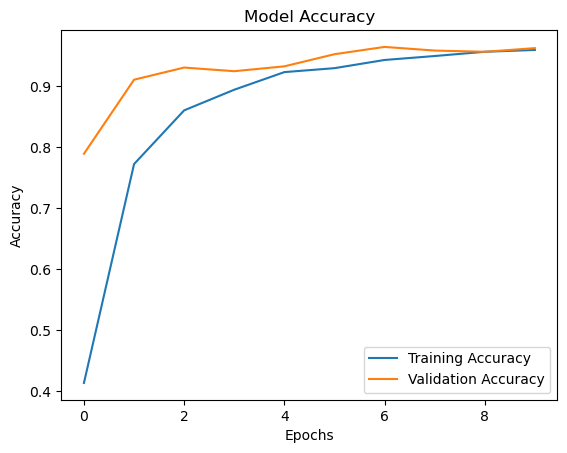

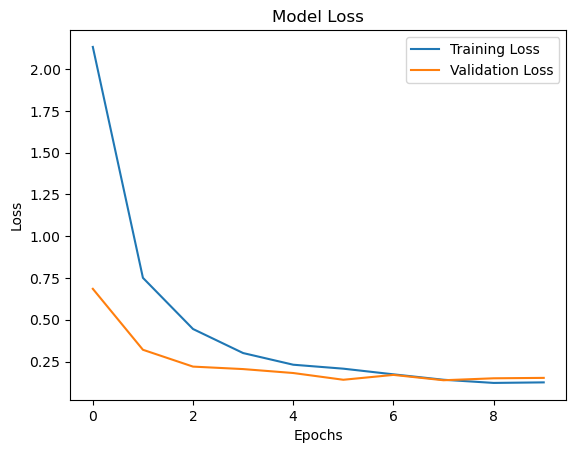

In [2]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the dataset
def load_data(data_dir):
    data = []
    labels = []
    
    # Get the list of subdirectories in the data directory
    class_names = sorted(os.listdir(data_dir))
    classes = len(class_names)
    
    # Loop over the class directories (numeric and alphabetic)
    for i, class_name in enumerate(class_names):
        path = os.path.join(data_dir, class_name)
        
        # Check if the directory exists before proceeding
        if not os.path.isdir(path):
            continue
        
        images = os.listdir(path)
        for img in images:
            try:
                image = Image.open(os.path.join(path, img))
                image = image.resize((64, 64))  # Resize to 64x64 pixels
                data.append(np.array(image))
                labels.append(i)  # Use the index as the class label
            except Exception as e:
                print(f"Error loading image {img}: {e}")

    data = np.array(data) / 255.0  # Normalize pixel values
    labels = np.array(labels)
    return data, labels

# Step 2: Create the CNN model
def create_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Step 3: Main function to train the model
def main():
    data_dir ='asl_dataset'  # Update this to your dataset path
    images, labels = load_data(data_dir)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

    # Convert labels to one-hot encoding
    y_train = to_categorical(y_train, num_classes=len(np.unique(labels)))
    y_test = to_categorical(y_test, num_classes=len(np.unique(labels)))

    # Create and compile the model
    model = create_model((64, 64, 3), len(np.unique(labels)))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

    # Save the model
    model.save('sign_language_model.h5')

    # Plot training history
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.2215 - loss: 2.9496 - val_accuracy: 0.8131 - val_loss: 0.6555
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.7205 - loss: 0.9408 - val_accuracy: 0.8966 - val_loss: 0.3795
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.8231 - loss: 0.5466 - val_accuracy: 0.9185 - val_loss: 0.2552
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.8821 - loss: 0.3638 - val_accuracy: 0.9225 - val_loss: 0.2009
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.9032 - loss: 0.2840 - val_accuracy: 0.9364 - val_loss: 0.1767
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.9108 - loss: 0.2565 - val_accuracy: 0.9483 - val_loss: 0.1639
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.9392 - loss: 0.1910 - val_accuracy: 0.9543 - val_loss: 0.1612
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.9332 - loss: 0.1775 - val_accuracy: 0.9622 - v

Model saved as sign_language_model.h5


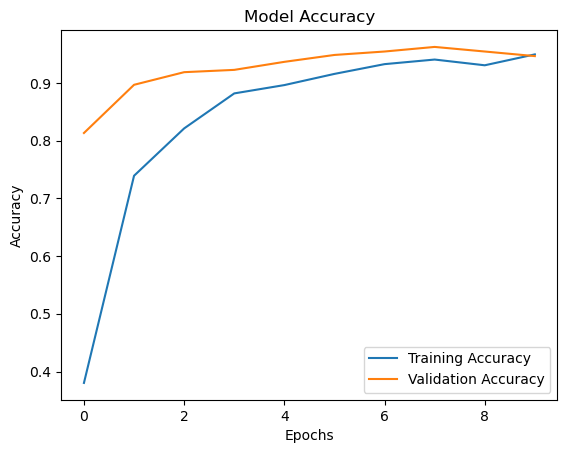

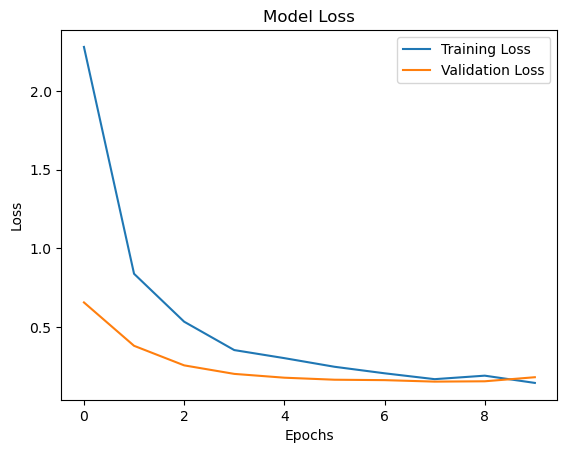

In [3]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the dataset
def load_data(data_dir):
    data = []
    labels = []
    
    # Get the list of subdirectories in the data directory
    class_names = sorted(os.listdir(data_dir))
    classes = len(class_names)
    
    # Loop over the class directories (numeric and alphabetic)
    for i, class_name in enumerate(class_names):
        path = os.path.join(data_dir, class_name)
        
        # Check if the directory exists before proceeding
        if not os.path.isdir(path):
            continue
        
        images = os.listdir(path)
        for img in images:
            try:
                image = Image.open(os.path.join(path, img))
                image = image.resize((64, 64))  # Resize to 64x64 pixels
                data.append(np.array(image))
                labels.append(i)  # Use the index as the class label
            except Exception as e:
                print(f"Error loading image {img}: {e}")

    data = np.array(data) / 255.0  # Normalize pixel values
    labels = np.array(labels)
    return data, labels

# Step 2: Create the CNN model
def create_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Step 3: Main function to train the model
def main():
    data_dir = 'asl_dataset'  # Update this to your dataset path
    images, labels = load_data(data_dir)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

    # Convert labels to one-hot encoding
    y_train = to_categorical(y_train, num_classes=len(np.unique(labels)))
    y_test = to_categorical(y_test, num_classes=len(np.unique(labels)))

    # Create and compile the model
    model = create_model((64, 64, 3), len(np.unique(labels)))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

    # Save the model to an .h5 file
    model_file = 'sign_language_model.h5'  # Specify file path and name
    model.save(model_file)
    print(f"Model saved as {model_file}")

    # Plot training history
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()
